# Exploratory Data Analysis

In [26]:
file_path = ('/Users/jessiefreelander/Flatiron_labs/Git_lab_Phase Project/Phase-2-Project/Data/cleaned_dataset.csv')
cleaned_dataset = pd.read_csv(file_path)
cleaned_dataset

,id,Release Date,Movie,Production Budget,Domestic Gross,World Wide Gross,Domestic Profit Ratio,World Wide Profit Ratio,Director,Genres,Release_Year,Rating
0,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,0.587101,2.546673,Rob Marshall,"Action,Adventure,Fantasy",2011,6.6
1,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350,0.122178,0.427892,Simon Kinberg,"Action,Adventure,Sci-Fi",2019,6.0
2,4,"May 1, 2015",avengers: age of ultron,330600000,459005868,1403013963,1.388403,4.243841,Joss Whedon,"Action,Adventure,Sci-Fi",2015,7.3
3,7,"Apr 27, 2018",avengers: infinity war,300000000,678815482,2048134200,2.262718,6.827114,Anthony Russo,"Action,Adventure,Sci-Fi",2018,8.5
4,9,"Nov 17, 2017",justice league,300000000,229024295,655945209,0.763414,2.186484,Zack Snyder,"Action,Adventure,Fantasy",2017,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2112,62,"Dec 31, 2014",stories of our lives,15000,0,0,0.000000,0.000000,Jim Chuchu,Drama,2014,7.5
2113,68,"Jul 6, 2001",cure,10000,94596,94596,9.459600,9.459600,Bill Yip,Drama,2011,4.9
2114,73,"Jan 13, 2012",newlyweds,9000,4584,4584,0.509333,0.509333,Edward Burns,"Comedy,Drama",2011,6.4
2115,78,"Dec 31, 2018",red 11,7000,0,0,0.000000,0.000000,Robert Rodriguez,"Horror,Sci-Fi,Thriller",2019,5.6


## Profitability Regression Line

Text(0.5, 1.0, 'Profitability')

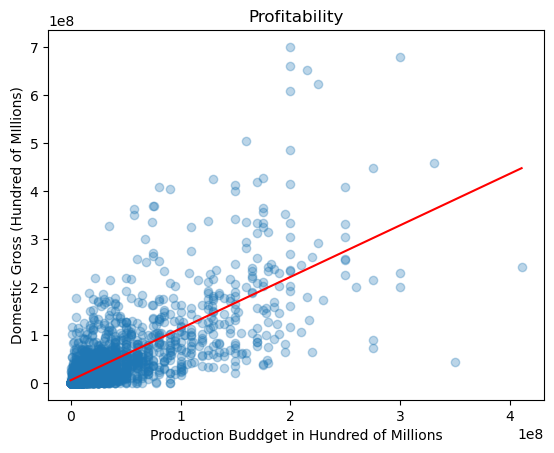

In [29]:
x = cleaned_dataset['Production Budget']
y = cleaned_dataset['Domestic Gross']
plt.scatter(x,y, alpha = 0.3, label = 'Profitability Scale')
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, slope * x + intercept, color='red', label='Regression')
plt.xlabel('Production Buddget in Hundred of Millions')
plt.ylabel('Domestic Gross (Hundred of MIllions)')
plt.title('Profitability')

## Splitting Movie Genres

In [27]:
cleaned_dataset['Genres'] = cleaned_dataset['Genres'].str.split(',')
exploded_data = cleaned_dataset.explode('Genres')
genre_counts = exploded_data['Genres'].value_counts()
print(genre_counts)

Genres
Drama          1058
Comedy          648
Action          531
Adventure       399
Thriller        372
Crime           289
Horror          275
Romance         254
Biography       172
Mystery         171
Sci-Fi          168
Fantasy         146
Family          117
Animation       116
Documentary     116
Music            64
History          57
Sport            46
War              31
Musical          17
Western          14
News              1
Name: count, dtype: int64


## Discovering Profitabiltiy Ratio means

In [28]:
genre_profitability = exploded_data.groupby('Genres')['Domestic Profit Ratio'].mean()
genre_profitability = genre_profitability.sort_values(ascending=False)
genre_profitability

Genres
Mystery        4.188854
Horror         3.868937
Documentary    3.029431
Thriller       2.752909
Sport          2.596411
Biography      2.198655
Comedy         1.799203
Music          1.779721
Romance        1.737714
Drama          1.657161
Sci-Fi         1.434556
Family         1.329823
Action         1.326720
Fantasy        1.267215
Animation      1.217907
Adventure      1.143588
Crime          1.031408
History        0.985856
Musical        0.952394
Western        0.773144
War            0.756815
News           0.012384
Name: Domestic Profit Ratio, dtype: float64

## Graphing Production Budget Binned by Genre

/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_30369/1490389485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genres', y='Production Budget', data=exploded_data, palette='Blues', showfliers=False)


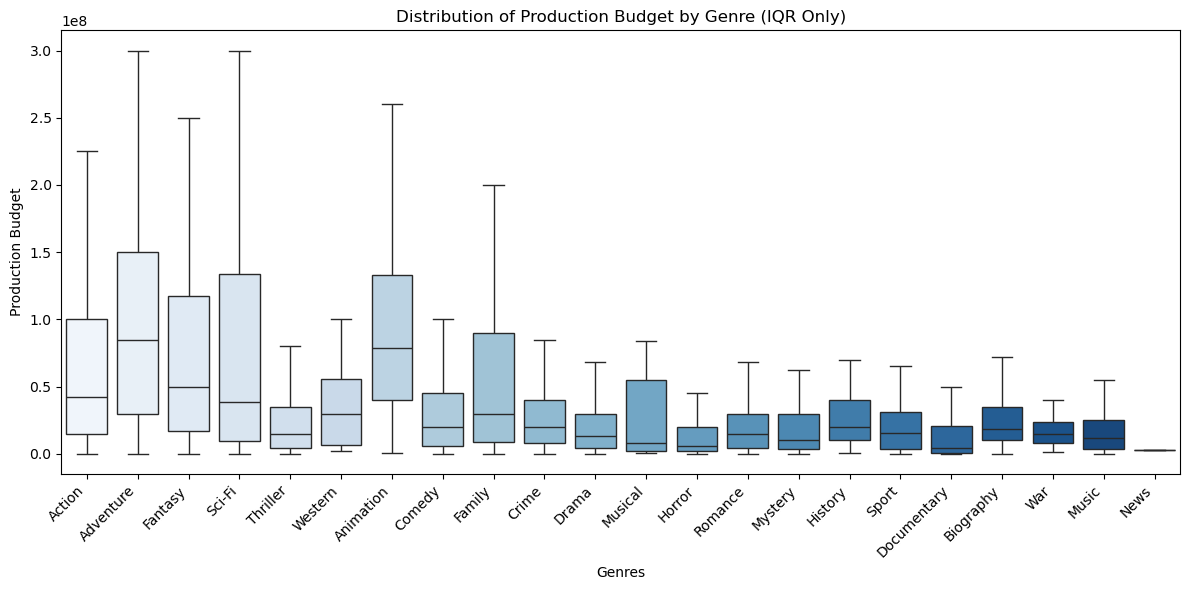

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genres', y='Production Budget', data=exploded_data, palette='Blues', showfliers=False)
plt.xlabel('Genres')
plt.ylabel('Production Budget')
plt.title('Distribution of Production Budget by Genre (IQR Only)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Graphing Profit Ratio Binned by Genre

/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_30369/2673206072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genres', y='Domestic Profit Ratio', data=exploded_data, palette='Blues', showfliers=False)


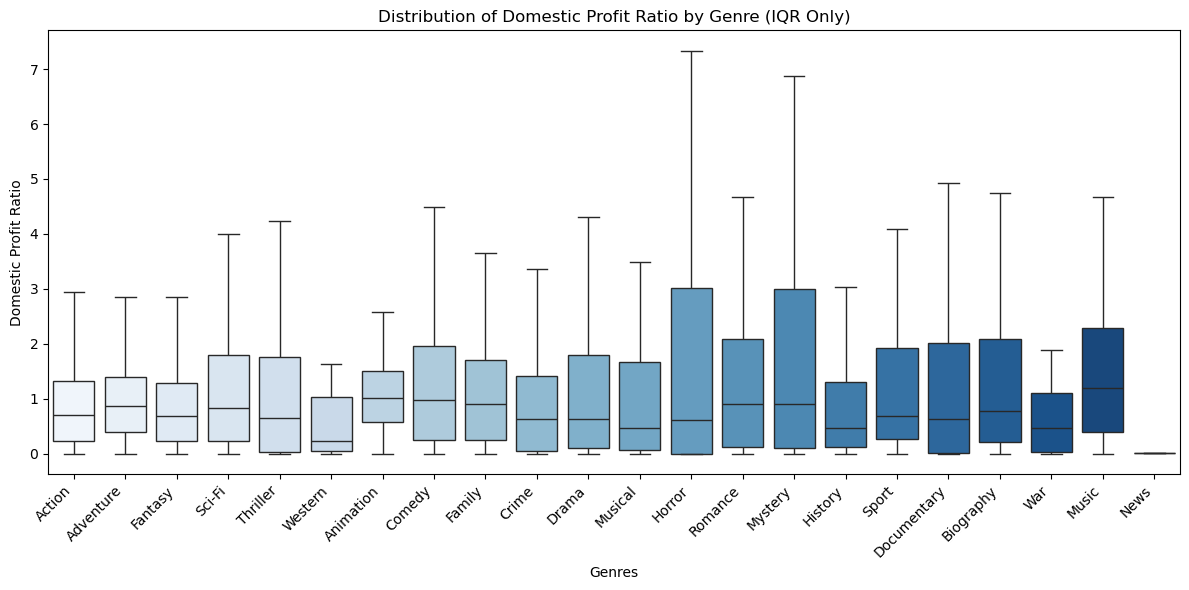

In [33]:
plt.figure(figsize=(12, 6))  # Set figure size

sns.boxplot(x='Genres', y='Domestic Profit Ratio', data=exploded_data, palette='Blues', showfliers=False)

plt.xlabel('Genres')
plt.ylabel('Domestic Profit Ratio')
plt.title('Distribution of Domestic Profit Ratio by Genre (IQR Only)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Finding The Best Horror Directors and Their avaerage Profitability Ratio

In [40]:
Horror_movies = exploded_data[exploded_data['Genres'] == 'Horror']
Horror_directors_profit = Horror_movies.groupby('Director')['Domestic Profit Ratio'].mean().reset_index()
top_10_Horror_directors = Horror_directors_profit.sort_values(by='Domestic Profit Ratio', ascending=False).head(10)
top_10_Horror_directors_avg_cost = Horror_movies[Horror_movies['Director'].isin(top_10_Horror_directors['Director'])]
top_10_Horror_directors_avg_cost = top_10_Horror_directors_avg_cost.groupby('Director')['Production Budget'].mean().reset_index()
print(top_10_Horror_directors)
print(top_10_Horror_directors_avg_cost)


               Director  Domestic Profit Ratio
233        Travis Cluff             227.644100
138     Levan Gabriadze              32.789645
77      Franck Khalfoun              28.571429
243  William Brent Bell              28.422450
230        Tod Williams              28.250969
126        Jordan Peele              21.979240
97            James Wan              21.438054
11       Ariel Schulman              20.805761
17       Bradley Parker              18.119640
211     Steven M. Smith              17.985000
             Director  Production Budget
0      Ariel Schulman          5000000.0
1      Bradley Parker          1000000.0
2     Franck Khalfoun           350000.0
3           James Wan         10750000.0
4        Jordan Peele         12500000.0
5     Levan Gabriadze          1000000.0
6     Steven M. Smith          1000000.0
7        Tod Williams          3000000.0
8        Travis Cluff           100000.0
9  William Brent Bell          5500000.0


## Graphing Top Director's Profit Ratio and There Frequency in Dataset

/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_30369/557289995.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(directors_stats['Director'], rotation=45, ha='right')


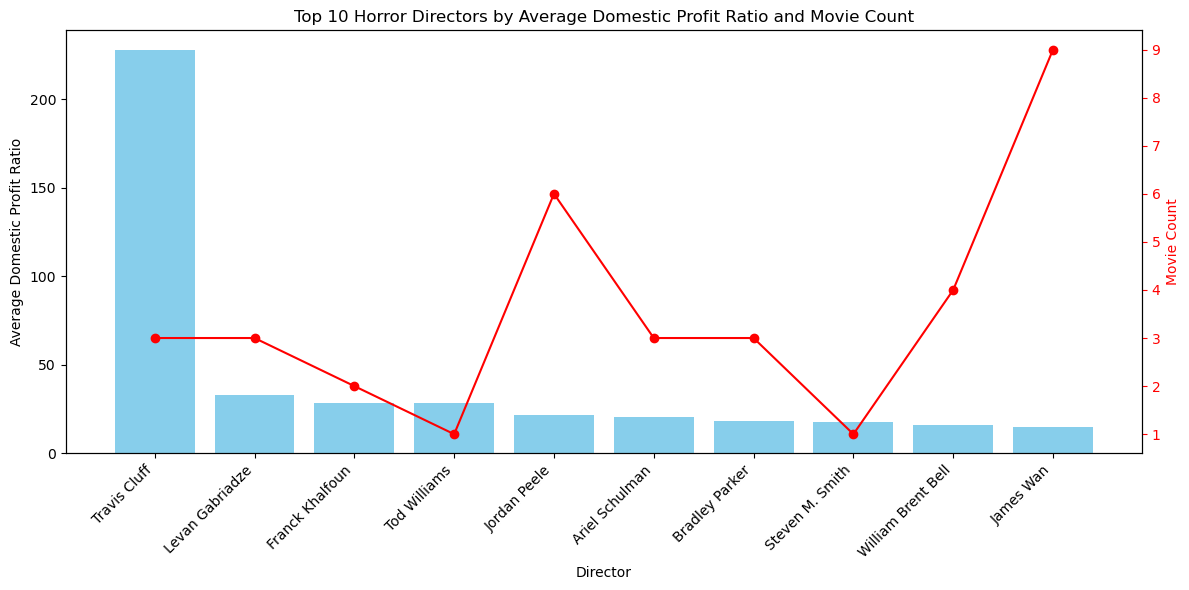

In [39]:
top_10_horror_directors = exploded_data[exploded_data['Director'].isin(top_10_Horror_directors['Director'])]
directors_stats = top_10_horror_directors.groupby('Director').agg({
    'Domestic Profit Ratio': 'mean',
    'Movie': 'count' 
}).reset_index()
directors_stats = directors_stats.rename(columns={'Movie': 'Movie Count'})
directors_stats = directors_stats.sort_values(by='Domestic Profit Ratio', ascending=False)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(directors_stats['Director'], directors_stats['Domestic Profit Ratio'], color='skyblue', label='Average Domestic Profit Ratio')
ax1.set_xlabel('Director')
ax1.set_ylabel('Average Domestic Profit Ratio', color='black')
ax1.tick_params('y', colors='black')
ax1.set_title('Top 10 Horror Directors by Average Domestic Profit Ratio and Movie Count')
ax1.set_xticklabels(directors_stats['Director'], rotation=45, ha='right')
ax2 = ax1.twinx()
ax2.plot(directors_stats['Director'], directors_stats['Movie Count'], color='red', marker='o', label='Movie Count')
ax2.set_ylabel('Movie Count', color='red')
ax2.tick_params('y', colors='red')
fig.tight_layout()
plt.show()

## Graphing Top Directors and There Average Production Budget

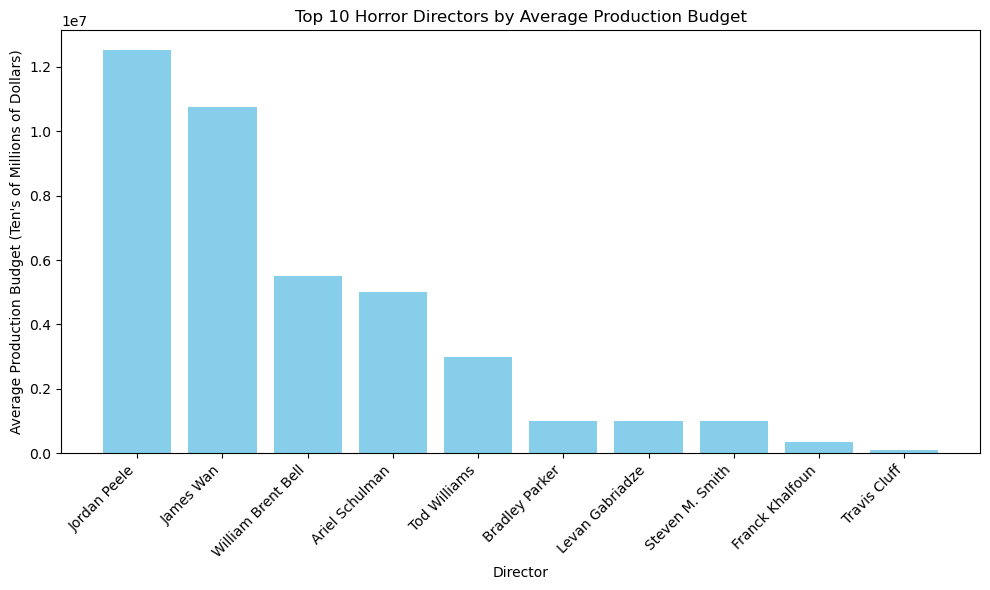

In [41]:
top_10_Horror_directors_avg_cost = top_10_Horror_directors_avg_cost.sort_values(by='Production Budget', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(top_10_Horror_directors_avg_cost['Director'], top_10_Horror_directors_avg_cost['Production Budget'], color='skyblue')
plt.xlabel('Director')
plt.ylabel("Average Production Budget (Ten's of Millions of Dollars)")
plt.title('Top 10 Horror Directors by Average Production Budget')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
